In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
single_image=x_train[0]

In [38]:
single_image.shape

(28, 28)

In [39]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

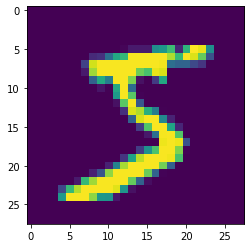

In [40]:
plt.imshow(single_image)

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_train.shape

(60000,)

In [44]:
y_example = to_categorical(y_train)

In [45]:
y_example.shape

(60000, 10)

In [46]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [47]:
y_cat_test = to_categorical(y_test,num_classes =10)

In [48]:
y_cat_train = to_categorical(y_train,num_classes =10)

In [49]:
single_image.max()

255

In [50]:
single_image.min()

0

In [51]:
x_train = x_train/255

In [52]:
x_test = x_test/255

In [53]:
scaled_image = x_train[0]

In [54]:
scaled_image.max()

1.0

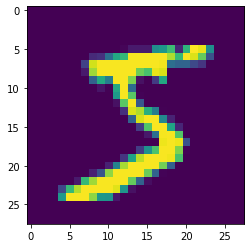

In [55]:
plt.imshow(scaled_image)

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_test.shape

(10000, 28, 28)

In [29]:
#batch size,width,height,color channel
x_train = x_train.reshape(60000,28,28,1)


In [58]:
x_test = x_test.reshape(10000,28,28,1)

In [59]:
from tensorflow.keras.models import Sequential


In [60]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [64]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
          
model.add(MaxPool2D(pool_size=(2,2)))
          
          
model.add(Flatten())
          
model.add(Dense(128,activation='relu'))
          
#out layer ---> softmax ---> Multiclass
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [68]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1374 - accuracy: 0.9594 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0421 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0395 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0428 - val_accuracy: 0.9877


In [69]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

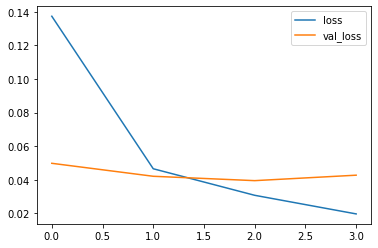

In [71]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

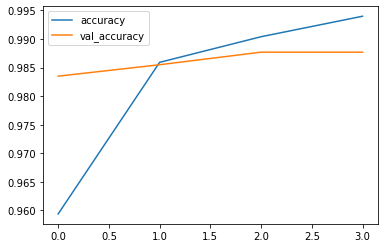

In [72]:
metrics[['accuracy','val_accuracy']].plot()

In [73]:
model.metrics_names

['loss', 'accuracy']

In [74]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9877


[0.042781952768564224, 0.9876999855041504]

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [78]:
y_cat_test.shape

(10000, 10)

In [79]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [81]:
confusion_matrix(y_test,predictions)

array([[ 968,    0,    2,    0,    0,    2,    4,    1,    2,    1],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1023,    1,    1,    0,    1,    2,    3,    0],
       [   0,    0,    3,  999,    0,    6,    0,    0,    2,    0],
       [   0,    0,    0,    0,  972,    0,    4,    0,    0,    6],
       [   1,    0,    0,    5,    0,  884,    1,    0,    1,    0],
       [   2,    3,    0,    1,    3,    3,  946,    0,    0,    0],
       [   0,    2,    9,    1,    0,    0,    0, 1012,    1,    3],
       [   2,    0,    3,    4,    1,    0,    2,    2,  957,    3],
       [   0,    1,    1,    7,    7,    7,    0,    2,    1,  983]],
      dtype=int64)

<AxesSubplot:>

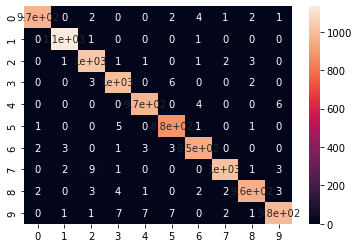

In [85]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [86]:
my_number = x_test[7]

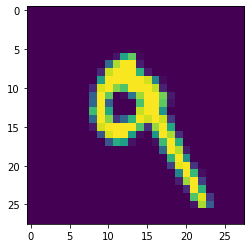

In [88]:
plt.imshow(my_number.reshape(28,28))

In [98]:
t = my_number.reshape(1,28,28,1)

In [101]:
predict_x=model.predict(t) 
classes_x=np.argmax(predict_x,axis=1)

In [102]:
classes_x

array([9], dtype=int64)